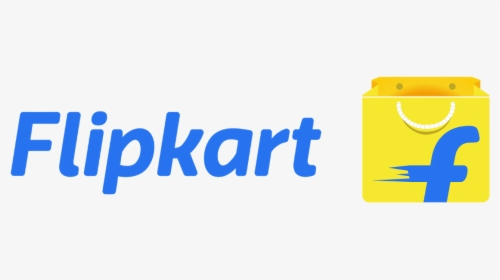

In [184]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import numpy as np
import re
from google.colab import files

In [175]:
#For Checking and Appending to List
def AppendIt(value):
  if value is None:
    return np.NaN  
  else:
    return value.text

#Lists To store Data
title, features,  price, OrginalPrice, discount, rating = ([] for _ in range(6))

# Grabing Data From Page
def GrabData(page_soup):
  
  for ineed in page_soup.find_all('div', {"class": "_2kHMtA"}) :
     
      # Heading of Product
      prod_title = ineed.find('div', {'class' : '_4rR01T'})
      title.append(AppendIt(prod_title))
      # Price of Product
      prod_price = ineed.find('div', {'class' : '_30jeq3 _1_WHN1'})
      price.append(AppendIt(prod_price))
      # OrginalPrice of Product
      prod_Orginalprice = ineed.find('div', {'class' : '_3I9_wc _27UcVY'})
      OrginalPrice.append(AppendIt(prod_Orginalprice))
      # Discount of Product
      prod_discount= ineed.find('div', {'class' : '_3Ay6Sb'})
      discount.append(AppendIt(prod_discount))
      # Rating of Product
      prod_rating = ineed.find('div', {'class' : '_3LWZlK'})
      rating.append(AppendIt(prod_rating))
      # Features of Product
      prod_features = ineed.find('ul', {'class' : '_1xgFaf'})
      features.append(AppendIt(prod_features))


In [176]:
#Going through Pages
for page in range(1,37):
    url = "https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&as-pos=1&as-type=HISTORY&page={}".format(page)   
    flipkart_page = requests.get(url)
    htmlCode = flipkart_page.text
    page_soup = BeautifulSoup(htmlCode)

    GrabData(page_soup)
     

In [177]:
print(len(title))
print(len(price))
print(len(OrginalPrice))
print(len(discount))
print(len(rating))
print(len(features))


854
854
854
854
854
854


In [178]:
#Lists To store Data
brand, processors, ram, os, storage, display = ([] for _ in range(6))

# Getting More Details
def IterateFeatures(list_todo,regex,list_toappend):
  for x in list_todo :
    matches = re.findall(regex, x)
    if matches is None or not matches :
     list_toappend.append(np.NaN)
    else:
      list_toappend.append(matches)  
         

#Brand
brandRegex = r'^[a-zA-Z-]*'
IterateFeatures(title,brandRegex,brand)    
#Processor
proceRegex = r'^[AMD|Intel][\s\w]+Processor'
IterateFeatures(features,proceRegex,processors)
#RAM
ramRegex = r'[\d]+[\s]+GB[\s\w]+RAM'
IterateFeatures(features,ramRegex,ram)
#OS
osRegex = r'[\d]+[\s]bit[\s\w]+Operating System'
IterateFeatures(features,osRegex,os)
#Storage
storageRegex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
IterateFeatures(features,storageRegex,storage)


In [179]:
print(len(brand))
print(len(processors))
print(len(ram))
print(len(os))
print(len(storage))


854
854
854
854
854


In [181]:
df = pd.DataFrame({'Brand' : brand ,'Model':title,'Processor': processors,'Ram': ram,'OS':os,'Storage' : storage,'OrginalPrice': OrginalPrice,'Discount':discount,'Price':price,'Rating':rating})

In [182]:
df

,Brand,Model,Processor,Ram,OS,Storage,OrginalPrice,Discount,Price,Rating
0,[Nokia],Nokia PureBook S14 Core i5 10th Gen - (8 GB/51...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],"₹74,990",32% off,"₹50,990",5
1,[Nokia],Nokia PureBook S14 Core i5 11th Gen - (8 GB/51...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],"₹82,990",36% off,"₹52,790",NaN
2,[DELL],DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,[AMD Athlon Dual Core Processor],[4 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],"₹42,210",29% off,"₹29,890",4.2
3,[Lenovo],Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],"₹64,490",35% off,"₹41,490",4.2
4,[HP],HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],"₹49,590",11% off,"₹43,990",4.5
...,...,...,...,...,...,...,...,...,...,...
849,[HP],HP 15 Core i5 8th Gen - (8 GB/1 TB HDD/DOS/2 G...,[Intel Core i5 Processor],[8 GB DDR4 RAM],NaN,[1 TB HDD],NaN,NaN,"₹55,729",4.2
850,[Lenovo],Lenovo v15 Core i3 10th Gen - (4 GB/1 TB HDD/D...,[Intel Core i3 Processor],[4 GB DDR4 RAM],[64 bit DOS Operating System],[1 TB HDD],"₹43,999",9% off,"₹39,999",3.1
851,[MSI],MSI Bravo Ryzen 5 Hexa Core 5600H - (8 GB/512 ...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],"₹83,990",22% off,"₹64,990",4.6
852,[ASUS],ASUS Vivobook 15 Core i3 11th Gen - (8 GB/1 TB...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD],"₹51,990",17% off,"₹42,800",2.8


In [183]:
df.to_csv('LaptopDataSet.csv', encoding = 'utf-8-sig') 
files.download('LaptopDataSet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>